# Tresvista Case Study

In [1]:
# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# import
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# read dataset
df = pd.read_csv('./ds1.csv')

In [3]:
# Display head first 5 rows
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


In [4]:
# columns
print(df.columns)

Index(['customer_id', 'demographic_slice', 'country_reg', 'ad_exp',
       'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore',
       'imp_crediteval', 'axio_score', 'card_offer'],
      dtype='object')


In [5]:
# info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           10000 non-null bool
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 869.2+ KB
None


In [6]:
#returns dimension
df.shape

(10000, 12)

In [7]:
# check nulls
print('Columns With Nulls')
df.isnull().sum()

Columns With Nulls


customer_id          0
demographic_slice    0
country_reg          0
ad_exp               0
est_income           0
hold_bal             0
pref_cust_prob       0
imp_cscore           0
RiskScore            0
imp_crediteval       0
axio_score           0
card_offer           0
dtype: int64

In [8]:
# Drop customer_id as its used in identification of customer and not useful for prediction
df.drop(['customer_id'],axis=1,inplace=True)

In [9]:
# Display first 3 rows
df.head(3)

,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False


In [10]:
# convert string / categoric to numeric --> AX03efs=0, BWEsk45=1, CARDIF2=2,DERS3w5=3
le=LabelEncoder()
df["demographic_slice"]=le.fit_transform(df["demographic_slice"])

In [11]:
# convert string / categoric to numeric --> E=0, W=1
le=LabelEncoder()
df["country_reg"]=le.fit_transform(df["country_reg"])

In [12]:
# convert string / categoric to numeric --> N=0, Y=1
le=LabelEncoder()
df["ad_exp"]=le.fit_transform(df["ad_exp"])

In [13]:
# convert string / categoric to numeric --> False=0, True=1
le=LabelEncoder()
df["card_offer"]=le.fit_transform(df["card_offer"])

In [14]:
df.head()

,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,0,1,0,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,0
1,0,0,0,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,0
2,0,1,1,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,0
3,0,0,1,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,0
4,0,1,0,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,0


In [15]:
#view some basic statistical details like percentile, mean, std, max
df.describe()

,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.494800,0.499300,0.499400,65853.355259,20.962621,0.329419,662.548800,670.042869,25.692162,0.393211,0.153100
std,1.118257,0.500025,0.500025,31093.369592,18.841121,0.223299,90.549985,89.965854,1.889274,0.288243,0.360102
min,0.000000,0.000000,0.000000,2.054543,-2.140206,0.001781,500.000000,324.436647,21.363123,-0.000052,0.000000
25%,1.000000,0.000000,0.000000,39165.786086,6.150577,0.156965,600.000000,609.231181,24.295435,0.139424,0.000000
50%,1.000000,0.000000,0.000000,76903.628763,11.913366,0.272263,655.000000,669.493442,25.611903,0.337841,0.000000
75%,3.000000,1.000000,1.000000,91032.514900,32.238914,0.459890,727.000000,730.484985,27.062519,0.624886,0.000000
max,3.000000,1.000000,1.000000,150538.809704,81.759632,1.144357,849.000000,1004.497869,30.131214,1.000000,1.000000


In [16]:
# udf for outliers
def iqrOutlier(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [17]:
# check outliers
colNames = df.columns
for colName in colNames:
    colValues = df[colName].values
    print('Column: ', colName)
    outValues = iqrOutlier(colValues)
    print(outValues)
    print(" ")

Column:  demographic_slice
(array([], dtype=int64),)
 
Column:  country_reg
(array([], dtype=int64),)
 
Column:  ad_exp
(array([], dtype=int64),)
 
Column:  est_income
(array([], dtype=int64),)
 
Column:  hold_bal
(array([], dtype=int64),)
 
Column:  pref_cust_prob
(array([], dtype=int64),)
 
Column:  imp_cscore
(array([], dtype=int64),)
 
Column:  RiskScore
(array([], dtype=int64),)
 
Column:  imp_crediteval
(array([], dtype=int64),)
 
Column:  axio_score
(array([], dtype=int64),)
 
Column:  card_offer
(array([   5,   13,   14, ..., 9980, 9987, 9997], dtype=int64),)
 


In [18]:
# check relation with correlation - table
pd.options.display.float_format = '{:,.2f}'.format
print(df.corr())

                   demographic_slice  country_reg  ad_exp  est_income  \
demographic_slice               1.00        -0.02    0.00        0.68   
country_reg                    -0.02         1.00   -0.00       -0.01   
ad_exp                          0.00        -0.00    1.00       -0.01   
est_income                      0.68        -0.01   -0.01        1.00   
hold_bal                        0.20        -0.77    0.02        0.01   
pref_cust_prob                 -0.01        -0.01    0.01        0.01   
imp_cscore                      0.32         0.00    0.01        0.00   
RiskScore                       0.01        -0.01   -0.01        0.00   
imp_crediteval                  0.30        -0.00    0.01       -0.00   
axio_score                     -0.01        -0.00   -0.01       -0.00   
card_offer                      0.19        -0.13    0.00        0.28   

                   hold_bal  pref_cust_prob  imp_cscore  RiskScore  \
demographic_slice      0.20           -0.01        0.

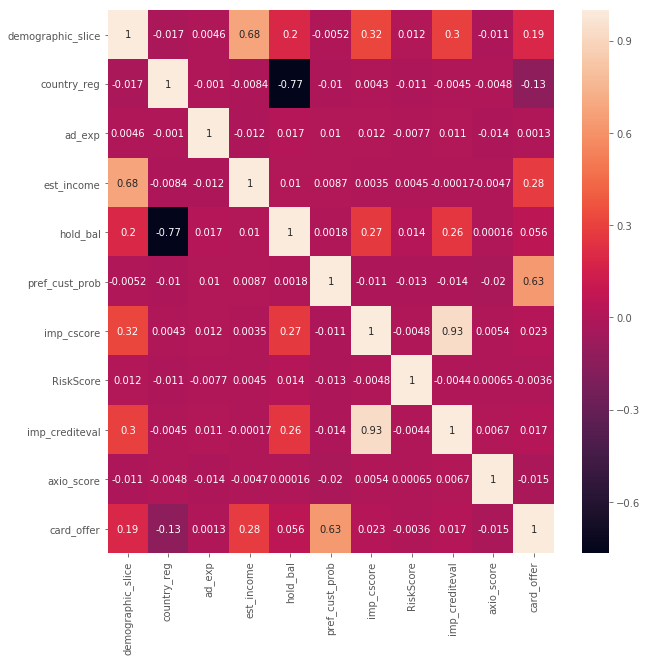

In [19]:
# check relation with corelation - heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Histograms


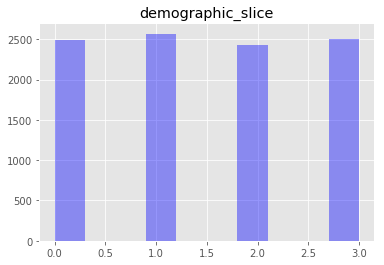

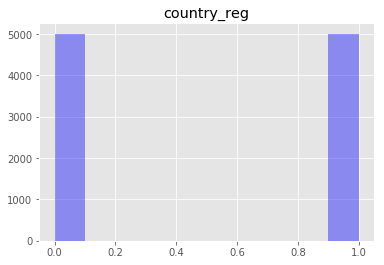

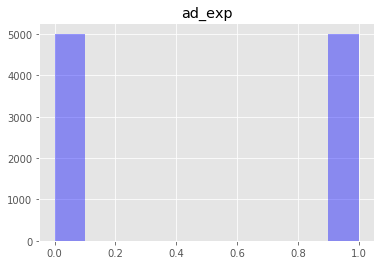

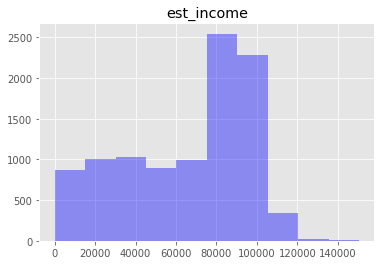

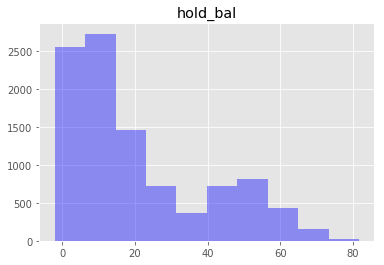

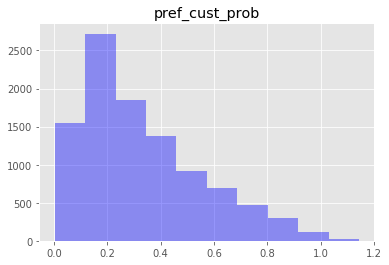

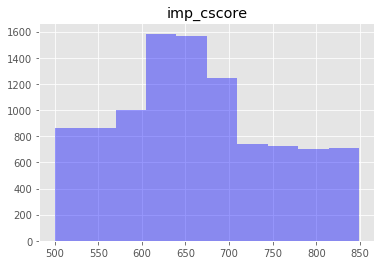

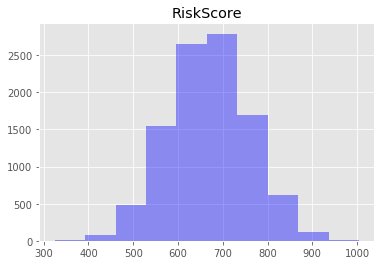

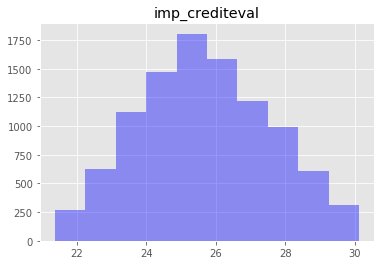

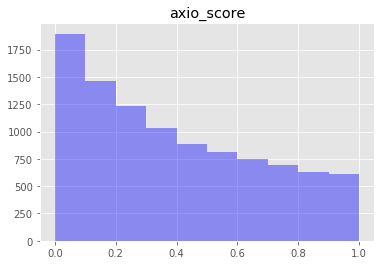

In [20]:
# plot histograms
colNames = df.columns.tolist()
colNames.remove('card_offer')
print('Histograms')
for colName in colNames:
    colValues = df[colName].values
    plt.figure();
    sns.distplot(colValues, bins=10, kde=False, color='b')
    plt.title(colName)

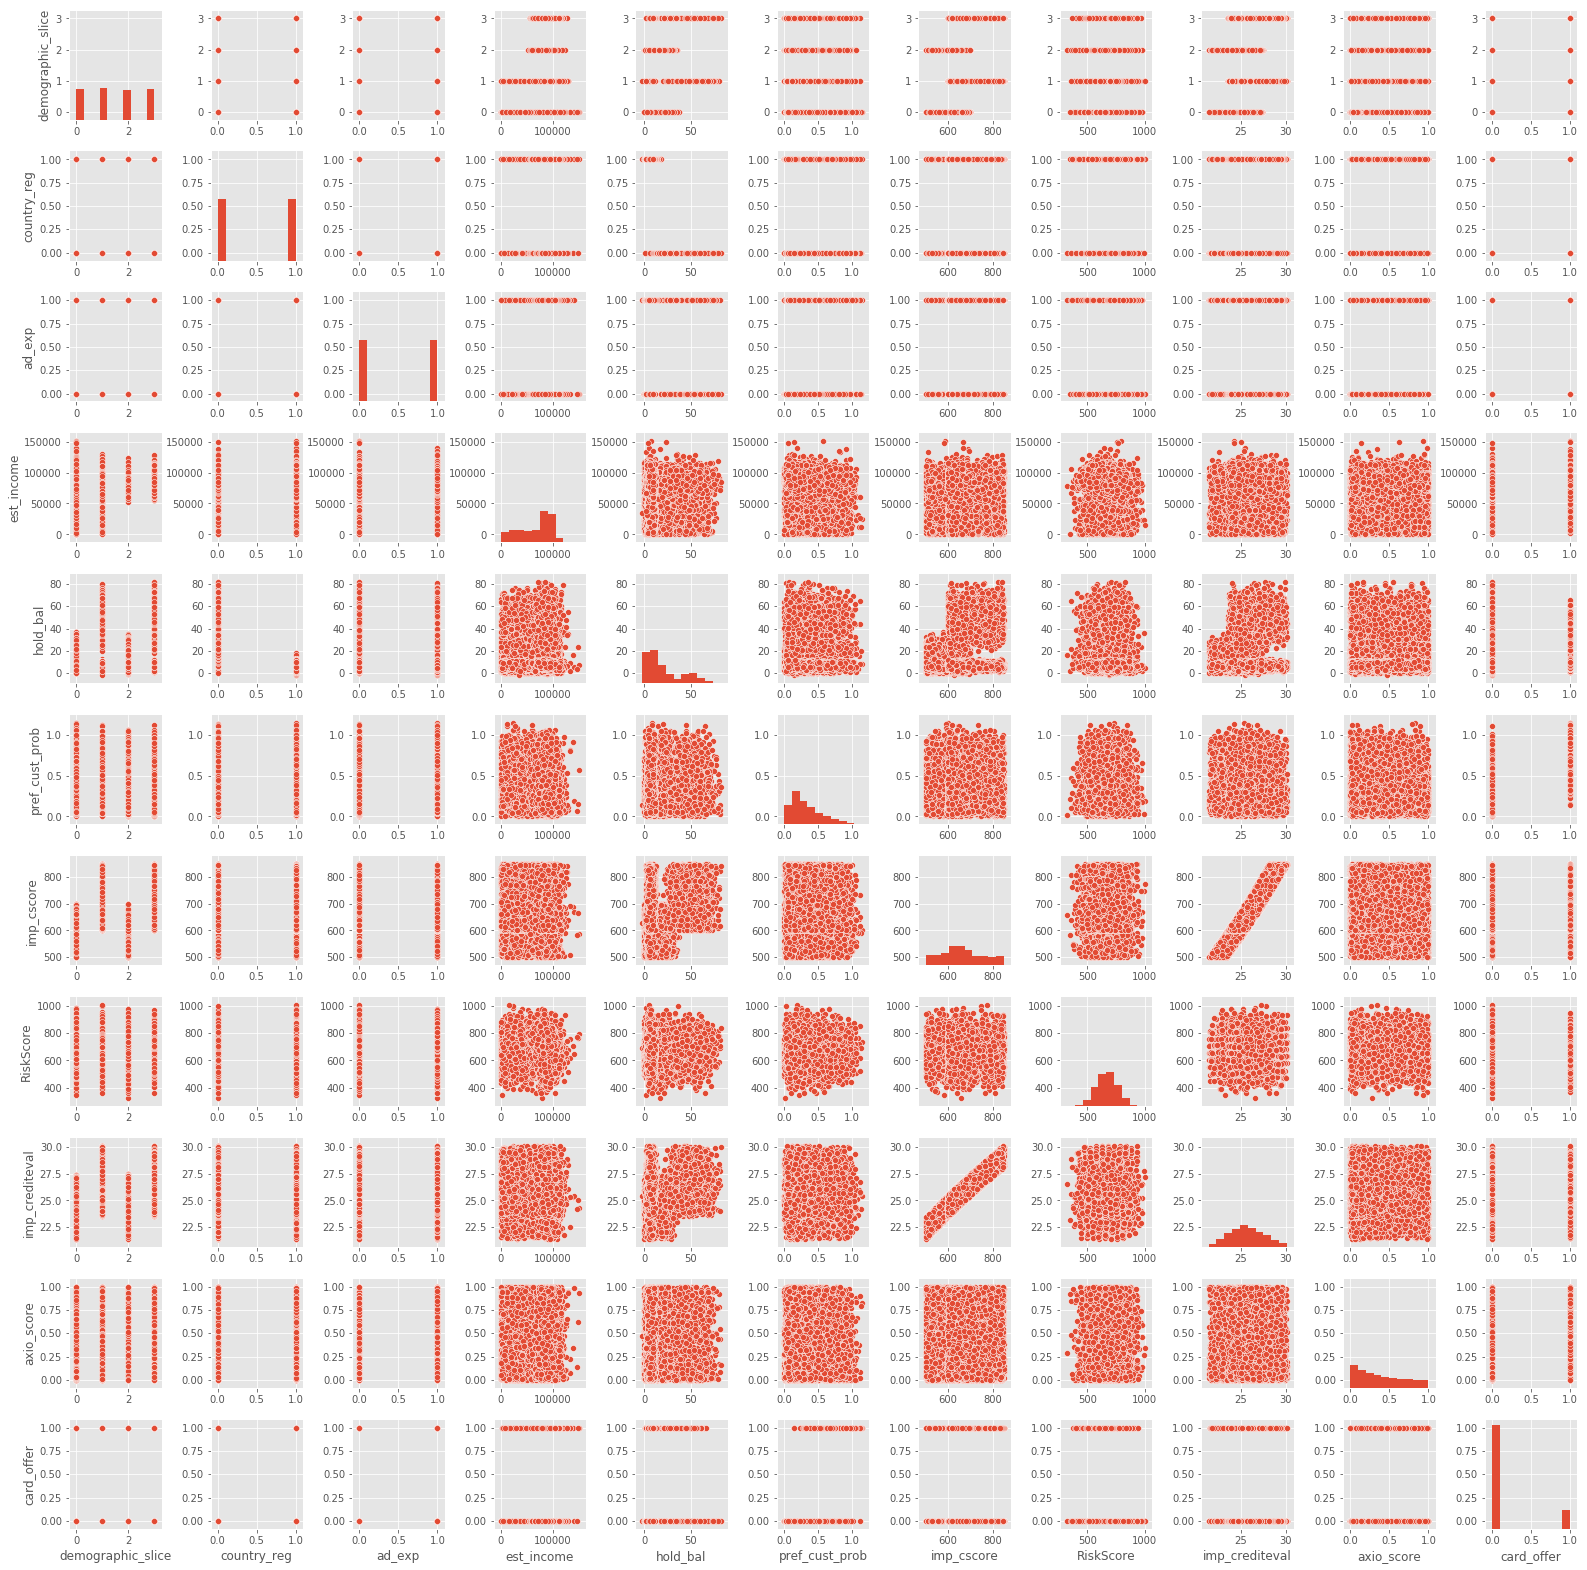

In [21]:
# check relation with pair-plot 
sns.pairplot(df, size=2);
#plt.show()

card_offer
0    8469
1    1531
dtype: int64


Text(0.5,1,'card_offer')

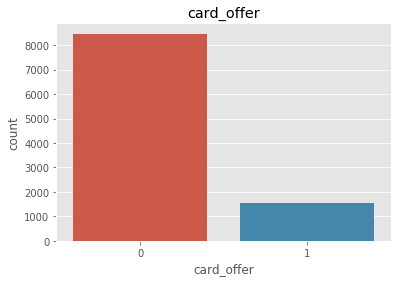

In [22]:
# check card_offer
# card_offer groupby count    
print(df.groupby('card_offer').size())

# card_offer
plt.figure();
sns.countplot(df['card_offer'],label="Count")
plt.title('card_offer')

In [23]:
##############################################################
# Features Selection
##############################################################

# imports
from sklearn.model_selection import train_test_split

# split into data & target
colNames = df.columns.tolist()
colNames.remove('card_offer')
print(colNames)
X = df[colNames].values
y = df['card_offer'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)

# logistic regression summary
import statsmodels.formula.api as sm
df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model_1 = sm.Logit(df_y_train, df_X_train)
result_1 = model_1.fit()
result_1.summary2()

['demographic_slice', 'country_reg', 'ad_exp', 'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore', 'imp_crediteval', 'axio_score']
Optimization terminated successfully.
         Current function value: 0.102529
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:                Logit            Pseudo R-squared: 0.762    
Dependent Variable:   0.0000           AIC:              1393.8854
Date:                 2018-12-16 21:41 BIC:              1461.9841
No. Observations:     6700             Log-Likelihood:   -686.94  
Df Model:             9                LL-Null:          -2882.0  
Df Residuals:         6690             LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       10.0000                                     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
demographic_slice  0.3243   0.0902   3.5949 0.0003  0.1475  0.5012
country_reg       -5.1641   0.2961 -17.4410 0.0000 -5.7444 -4.5837
ad_exp            -0.0887   0.1397  -0.6348 0.5256 -0.3625  0.1852
est_income         0.0001   0.0000  20.3274 0.0000  0.0001  0.0001
hold_bal          -0.0862   0.0073 -11.7285 0.0000 -0.1006 -0.0718
pref_cust_prob    20.9098   0.7943  26.3241 0.0000 19.3530 22.4667
imp_cscore         0.0290   0.0019  14.8588 0.0000  0.0251  0.0328
RiskScore         -0.0061   0.0008  -7.9505 0.0000 -0.0076 -0.0046
imp_crediteval    -1.2425   0.0687 -18.0885 0.0000 -1.3772 -1.1079
axio_score        -0.1810   0.2401  -0.7537 0.4510 -0.6517  0.2897
==================================================================

"""

In [24]:
##############################################################
# Features Selection
# From Model_1 as the probability (P>Z) is greater than 0.05, 
# so creating new model by dropping ad_exp and axio_score 
##############################################################

# imports
from sklearn.model_selection import train_test_split

# split into data & target
colNames = df.columns.tolist()
colNames.remove('card_offer')
colNames.remove('ad_exp')
colNames.remove('axio_score')
print(colNames)
X = df[colNames].values
y = df['card_offer'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)

# logistic regression summary
import statsmodels.formula.api as sm
df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model_2 = sm.Logit(df_y_train, df_X_train)
result_2 = model_2.fit()
result_2.summary2()

['demographic_slice', 'country_reg', 'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore', 'imp_crediteval']
Optimization terminated successfully.
         Current function value: 0.102603
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:                Logit            Pseudo R-squared: 0.761    
Dependent Variable:   0.0000           AIC:              1390.8824
Date:                 2018-12-16 21:41 BIC:              1445.3613
No. Observations:     6700             Log-Likelihood:   -687.44  
Df Model:             7                LL-Null:          -2882.0  
Df Residuals:         6692             LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       10.0000                                     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
demographic_slice  0.3251   0.0901   3.6084 0.0003  0.1485  0.5017
country_reg       -5.1529   0.2954 -17.4451 0.0000 -5.7318 -4.5740
est_income         0.0001   0.0000  20.3279 0.0000  0.0001  0.0001
hold_bal          -0.0860   0.0073 -11.7190 0.0000 -0.1004 -0.0716
pref_cust_prob    20.8787   0.7918  26.3676 0.0000 19.3267 22.4307
imp_cscore         0.0290   0.0019  14.8775 0.0000  0.0252  0.0328
RiskScore         -0.0061   0.0008  -7.9629 0.0000 -0.0076 -0.0046
imp_crediteval    -1.2468   0.0686 -18.1797 0.0000 -1.3812 -1.1124
==================================================================

"""

Model_2 is a better model as AIC value is smaller and psuedo R square value is 0.761 compared to Model_1 by dropping ad_exp and axio_score feature

In [25]:
# create logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.845
Test set score: 0.848


In [26]:
# cross validation
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(logreg, X, y, cv=10) #cv is folds
print("Mean Cross Validation Accuracy: {:.3f}".format(metrics.accuracy_score(y, predicted)))

C:\Users\Vasudeo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Mean Cross Validation Accuracy: 0.844


In [27]:
# Individual Cross Val Accuracy
from sklearn.cross_validation import cross_val_score
accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print ("Individual Cross Validation Accuracy")
print (accuracy)
print ("Mean Cross Validation Accuracy: {:.3f}".format(accuracy.mean()))

Individual Cross Validation Accuracy
[ 0.84915085  0.848       0.847       0.847       0.845       0.846       0.836
  0.838       0.842       0.84484484]
Mean Cross Validation Accuracy: 0.844


In [28]:
# Confusion Matrix
from nltk import ConfusionMatrix 
print (ConfusionMatrix(list(y), list(predicted)))

  |    0    1 |
--+-----------+
0 |<8433>  36 |
1 | 1521  <10>|
--+-----------+
(row = reference; col = test)



In [29]:
# check accuracy, 
print (metrics.accuracy_score(y, predicted))

0.8443


In [30]:
# check precision
print (metrics.precision_score(y, predicted) )

0.217391304348


In [31]:
# check recall
print (metrics.recall_score(y, predicted) )

0.00653167864141


In [32]:
#predict 1 for True and 0 for false
yP=logreg.predict(X)
print(yP)

[0 0 0 ..., 0 0 0]


[ 0.09548904  0.03028272  0.12070596 ...,  0.12425817  0.20901429
  0.2834993 ]


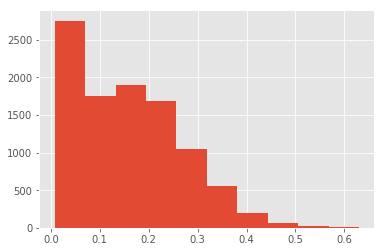

In [33]:
# probabality
probs = logreg.predict_proba(X)[:, 1]
print(probs)
plt.hist(probs) 
plt.show()

In [34]:
#calculate AUC
print(metrics.roc_auc_score(y,probs))

0.705929929719


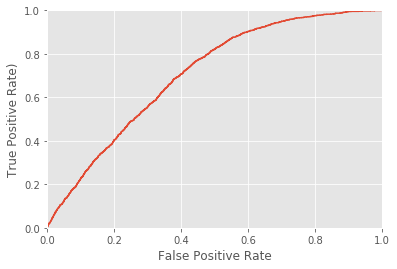

In [35]:
# ROC CURVES and AUC 
# plot ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

In [36]:
##############################################################
# Prediction
##############################################################

# read dataset
dfPrd = pd.read_csv('./ds4.csv')
print(dfPrd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           0 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 937.6+ KB
None


In [37]:
le=LabelEncoder()
dfPrd["demographic_slice"]=le.fit_transform(dfPrd["demographic_slice"])
le=LabelEncoder()
dfPrd["country_reg"]=le.fit_transform(dfPrd["country_reg"])
le=LabelEncoder()
dfPrd["ad_exp"]=le.fit_transform(dfPrd["ad_exp"])
le=LabelEncoder()
dfPrd["card_offer"]=le.fit_transform(dfPrd["card_offer"])

In [38]:
dfPrd.columns

Index(['customer_id', 'demographic_slice', 'country_reg', 'ad_exp',
       'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore',
       'imp_crediteval', 'axio_score', 'card_offer'],
      dtype='object')

In [39]:
# split into data & target
colNames = dfPrd.columns.tolist()
colNames.remove('card_offer')
colNames.remove('ad_exp')
colNames.remove('axio_score')
colNames.remove('customer_id')
print(colNames)
XPrd = dfPrd[colNames].values
yPrd = dfPrd['card_offer'].values

['demographic_slice', 'country_reg', 'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore', 'imp_crediteval']


In [40]:
# predict
logreg = LogisticRegression().fit(X, y) #using full dataset therefore, X,y. NO xtrain or ytrain
yPrd = logreg.predict(XPrd)
print(yPrd)

[0 0 0 ..., 0 0 0]


In [41]:
# actual
print(dfPrd['card_offer'].values)

[   0 6660 6661 ..., 3335 9686 9999]


In [42]:
dfPrd['card_offer'] = pd.DataFrame(yPrd)

In [43]:
# Replacing original values for demographic_slice
dfPrd['demographic_slice'] = np.where(dfPrd['demographic_slice']==0, 'AX03efs', np.where(dfPrd['demographic_slice']==1, 'BWEsk45',np.where(dfPrd['demographic_slice']==2, 'CARDIF2',np.where(dfPrd['demographic_slice']==3, 'DERS3w5', dfPrd['demographic_slice']))))

In [44]:
# Replacing original values for country_reg
dfPrd['country_reg'] = np.where(dfPrd['country_reg']==0, 'E', 'W')

In [45]:
# Replacing original values for ad_exp
dfPrd['ad_exp'] = np.where(dfPrd['ad_exp']==0, 'N', 'Y')

In [46]:
# Replacing 0 with False and 1 with True
dfPrd['card_offer'] = np.where(dfPrd['card_offer']==0, 'FALSE', 'TRUE')

In [47]:
dfPrd.to_csv('./ds4_VasudeoMaurya_predictions.csv', index=False)